<a href="https://colab.research.google.com/github/MSamhitha/Bike-Sharing-Demand-Prediction/blob/main/Cardiovascular_risk_prediction_Samhitha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**


The project aimed to address the critical issue of predicting the 10-year risk of Coronary Heart Disease (CHD) in individuals based on various health-related factors. CHD is a major health concern worldwide, and accurate risk assessment can help identify high-risk individuals for early intervention and prevention strategies. The challenge was to develop a reliable machine learning model that could effectively predict CHD risk, aiding in proactive healthcare decision-making.



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


### Dataset Loading

In [1]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/DATAS/data_cardiovascular_risk.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

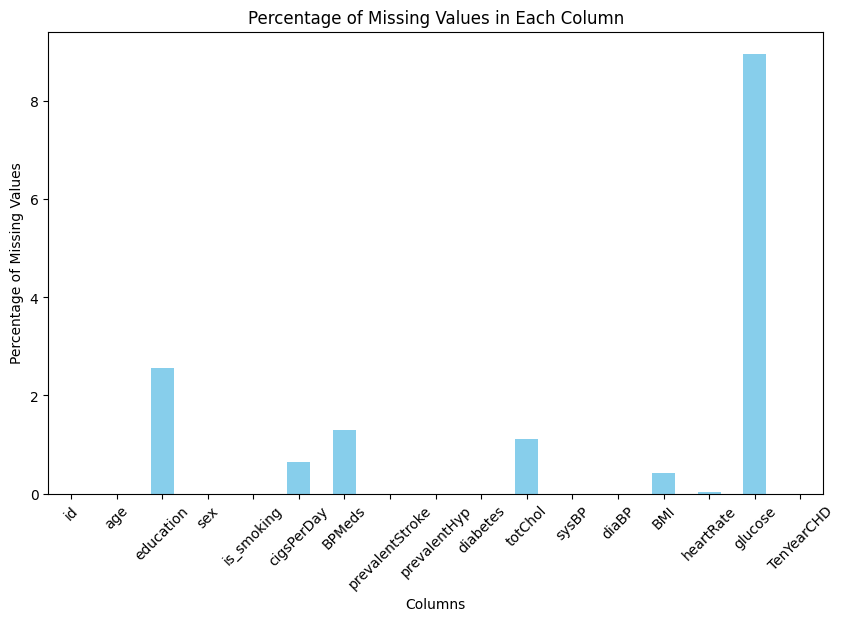

In [ ]:
# Visualizing the missing values

# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a bar plot to visualize the missing percentages
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values in Each Column')
plt.xticks(rotation=45)
plt.show()



In [ ]:
missing_percentage = print((df.isnull().sum() / len(df)) * 100)

### What did you know about your dataset?

Most of the columns have no missing values and some columns have very small amount(less than 3%) of missing values.Glucose have 9% of missing values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


### Variables Description

the variables include,

'id': This column represents an identifier or unique identifier for each individual in the dataset.

'age': It represents the age of the individual in years.

'education': This column represents the education level of the individual, which could be encoded categorically (e.g., high school, college, postgraduate) or numerically (e.g., years of education completed).

'sex': It indicates the biological sex of the individual, typically encoded as binary values (e.g., 0 for female, 1 for male).

'is_smoking': This column indicates whether the individual is currently smoking or not, typically encoded as binary values (e.g., 0 for non-smoker, 1 for smoker).

'cigsPerDay': It represents the number of cigarettes smoked per day by the individual.

'BPMeds': This column indicates whether the individual is taking blood pressure medication, typically encoded as binary values (e.g., 0 for not taking medication, 1 for taking medication).

'prevalentStroke': It indicates whether the individual has a history of stroke, typically encoded as binary values (e.g., 0 for no stroke history, 1 for stroke history).

'prevalentHyp': This column indicates whether the individual has prevalent hypertension (high blood pressure), typically encoded as binary values (e.g., 0 for no hypertension, 1 for hypertension).

'diabetes': It indicates whether the individual has diabetes, typically encoded as binary values (e.g., 0 for no diabetes, 1 for diabetes).

'totChol': This column represents the total cholesterol level of the individual in mg/dL (milligrams per deciliter).

'sysBP': It represents the systolic blood pressure of the individual in mmHg (millimeters of mercury).

'diaBP': This column represents the diastolic blood pressure of the individual in mmHg.

'BMI': It indicates the body mass index of the individual, which is a measure of body fat based on height and weight.

'heartRate': This column represents the resting heart rate of the individual in beats per minute.

'glucose': It represents the blood glucose (sugar) level of the individual in mg/dL.

'TenYearCHD': This column indicates the presence or absence of the ten-year risk of developing coronary heart disease (CHD) for the individual, typically encoded as binary values (e.g., 0 for no risk, 1 for risk).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.


In [5]:
df = df.drop(columns = ['id'])


In [ ]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## Dividing numerical and categorical data*

In [6]:
categorical = [var for var in df.columns if df[var].dtype=='O']
numerical = [var for var in df.columns if df[var].dtype!='O']


In [7]:
# Assigning a variable for discreet features and assigning the features to it which has less than 20 classes.
discreet = []

for var in df.columns:
  if var not in ['TenYearCHD']:
    if len(df[var].unique())<20:
        print(var, ' values: ', df[var].unique())
        discreet.append(var)

education  values:  [ 2.  4.  1.  3. nan]
sex  values:  ['F' 'M']
is_smoking  values:  ['YES' 'NO']
BPMeds  values:  [ 0. nan  1.]
prevalentStroke  values:  [0 1]
prevalentHyp  values:  [0 1]
diabetes  values:  [0 1]


In [8]:
continuous = [var for var in df.columns if var not in discreet and var not in ['TenYearCHD']]

### What all manipulations have you done and insights you found?

droped 'id' column And numerical variables in data set converted into descrete and contineous variables.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

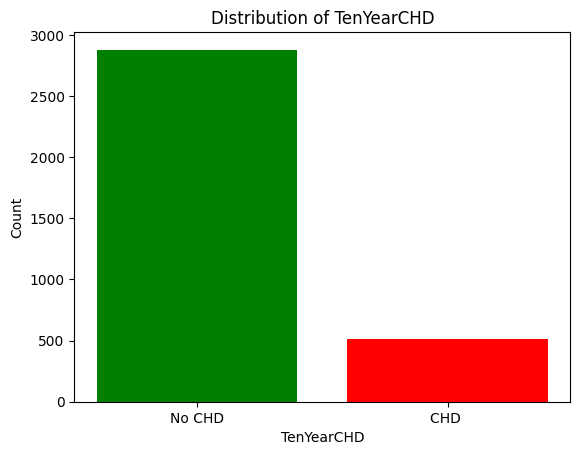

In [ ]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt

# Count the occurrences of each value in the 'TenYearCHD' column
chd_counts = df['TenYearCHD'].value_counts()

# Create a bar plot
plt.bar(chd_counts.index, chd_counts.values, color=['green', 'red'])

# Label the bars and the axes
plt.xlabel('TenYearCHD')
plt.ylabel('Count')
plt.title('Distribution of TenYearCHD')

# Customize the x-axis ticks for better readability (optional)
plt.xticks(chd_counts.index, ['No CHD', 'CHD '])

# Show the plot
plt.show()



##### 1. Why did you pick the specific chart?

I picked a bar chart to visualize the 'TenYearCHD' column because it is suitable for displaying the distribution of categorical data.

##### 2. What is/are the insight(s) found from the chart?

There are more individuals labeled as "No CHD" (around 2800) than those labeled as "CHD" (around 500).


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The dataset appears to be imbalanced, as there are significantly fewer instances of individuals with CHD risk compared to those without CHD risk.we need to balance the data.

#### Chart - 2

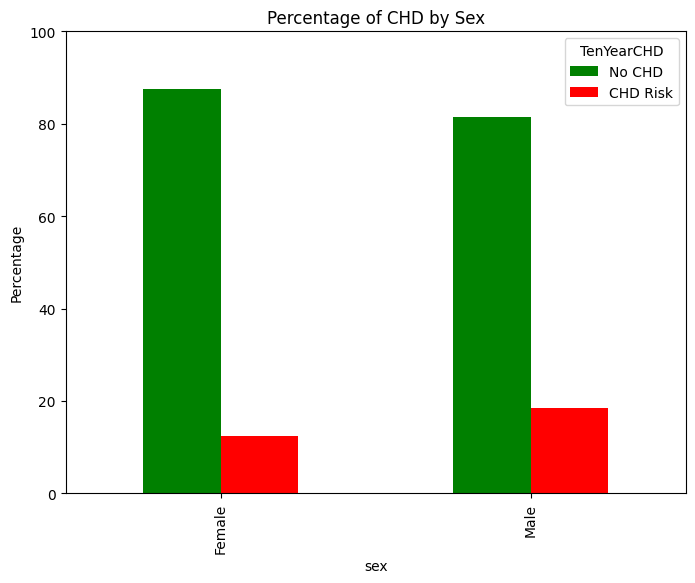

In [9]:
import matplotlib.pyplot as plt

# Group the data by 'TenYearCHD' and 'sex' and calculate the counts
freq_df = df.groupby('TenYearCHD')['sex'].value_counts().unstack(0)

# Calculate the percentage by dividing by the sum of each row
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0) * 100

# Create a bar plot with custom colors for 'No CHD' and 'CHD Risk'
ax = pct_df.plot(kind="bar", color=['green', 'red'], figsize=(8, 6))

# Set the y-axis limits to be between 0 and 100
plt.ylim(0, 100)

# Label the y-axis
plt.ylabel('Percentage')

# Set the x-axis ticks and labels
x_ticks_labels = ['Female', 'Male']
ax.set_xticks(range(len(x_ticks_labels)))
ax.set_xticklabels(x_ticks_labels)

# Add a title to the plot
plt.title('Percentage of CHD by Sex')

# Add a legend to specify colors
plt.legend(title='TenYearCHD', labels=['No CHD', 'CHD Risk'])

# Show the plot
plt.show()





##### 1. Why did you pick the specific chart?

I chose a stacked bar chart to compare the distribution of CHD risk (TenYearCHD) between different genders (Male and Female).

##### 2. What is/are the insight(s) found from the chart?

From the stacked bar chart, it appears that males have a slightly higher percentage of CHD risk compared to females.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gender-based difference in the likelihood of developing coronary heart disease (CHD) within the dataset can provide valuable insights for researchers and healthcare professionals.

#### Chart - 3

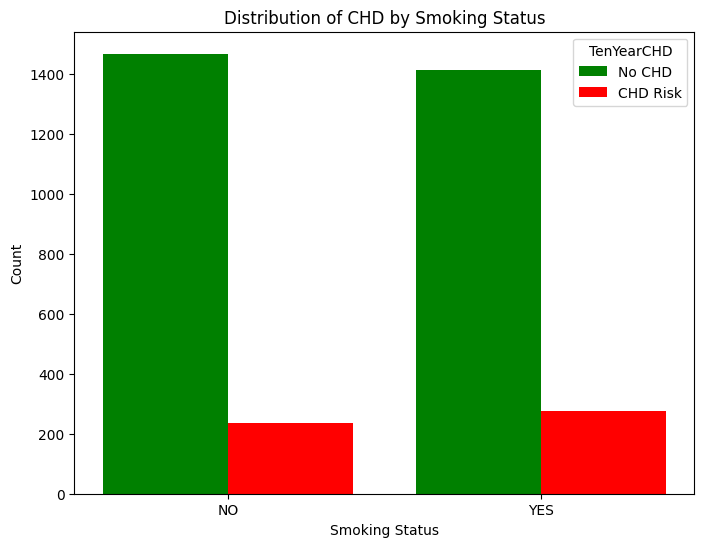

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Group the data by 'is_smoking' and 'TenYearCHD' and calculate the count of each combination
smoking_chd_counts = df.groupby(['is_smoking', 'TenYearCHD']).size().unstack()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Define the width for each bar group
width = 0.4

# Create an array of x positions for the bars
x = np.arange(len(smoking_chd_counts.index))

# Plot 'No CHD' counts
ax.bar(x - width/2, smoking_chd_counts[0], width=width, label='No CHD', color='green')

# Plot 'CHD Risk' counts
ax.bar(x + width/2, smoking_chd_counts[1], width=width, label='CHD Risk', color='red')

# Label the bars and axes
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Distribution of CHD by Smoking Status')

# Customize the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(smoking_chd_counts.index)

# Add a legend
plt.legend(title='TenYearCHD', labels=['No CHD', 'CHD Risk'], loc='upper right')

# Show the grouped bar chart
plt.show()


##### 1. Why did you pick the specific chart?

I chose a grouped bar chart to compare 'is_smoking' (smoking status) against 'TenYearCHD' (presence or absence of CHD risk).

##### 2. What is/are the insight(s) found from the chart?

From the grouped bar chart, it appears that individuals who smoke ('Yes' in the 'is_smoking' category) have a slightly higher frequency of CHD risk.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Awareness campaigns and educational programs can be tailored to emphasize the risks associated with smoking and CHD, potentially encouraging smokers to quit and adopt healthier lifestyles.

#### Chart - 4

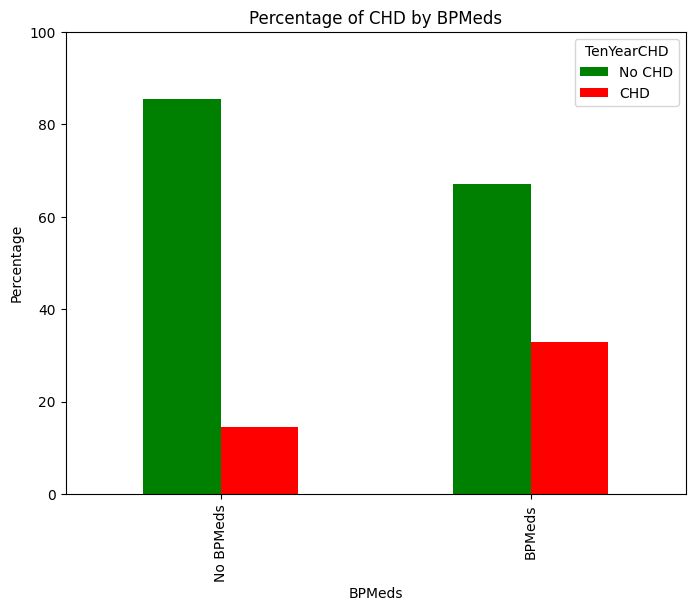

In [11]:
# Chart - 4 visualization code

# Group the data by 'TenYearCHD' and 'BPmeds' and calculate the counts
freq_df2 = df.groupby('TenYearCHD')['BPMeds'].value_counts().unstack(0)

# Calculate the percentage by dividing by the sum of each row
pct_df2 = freq_df2.divide(freq_df2.sum(axis=1), axis=0) * 100

# Create a bar plot with custom colors for 'No CHD' and 'CHD Risk'
ax = pct_df2.plot(kind="bar", color=['green', 'red'], figsize=(8, 6))

# Set the y-axis limits to be between 0 and 100
plt.ylim(0, 100)

# Label the y-axis
plt.ylabel('Percentage')

# Set the x-axis ticks and labels
x_ticks_labels = ['No BPMeds', 'BPMeds']
ax.set_xticks(range(len(x_ticks_labels)))
ax.set_xticklabels(x_ticks_labels)

# Add a title to the plot
plt.title('Percentage of CHD by BPMeds')

# Add a legend to specify colors
plt.legend(title='TenYearCHD', labels=['No CHD', 'CHD'])

# Show the plot
plt.show()



##### 1. Why did you pick the specific chart?

I chose a grouped bar chart to compare 'TenYearCHD' (presence or absence of CHD ) against 'BPMeds' (use of blood pressure medication).

##### 2. What is/are the insight(s) found from the chart?

From the grouped bar chart, it appears that individuals who are taking blood pressure medication ('BPMeds: Yes') have a higher count of CHD risk ('CHD Risk' in the 'TenYearCHD' category) compared to those who are not taking blood pressure medication ('BPMeds: No').

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Healthcare providers can use this information to tailor their treatment and monitoring strategies for patients who are taking blood pressure medication.

#### Chart - 5

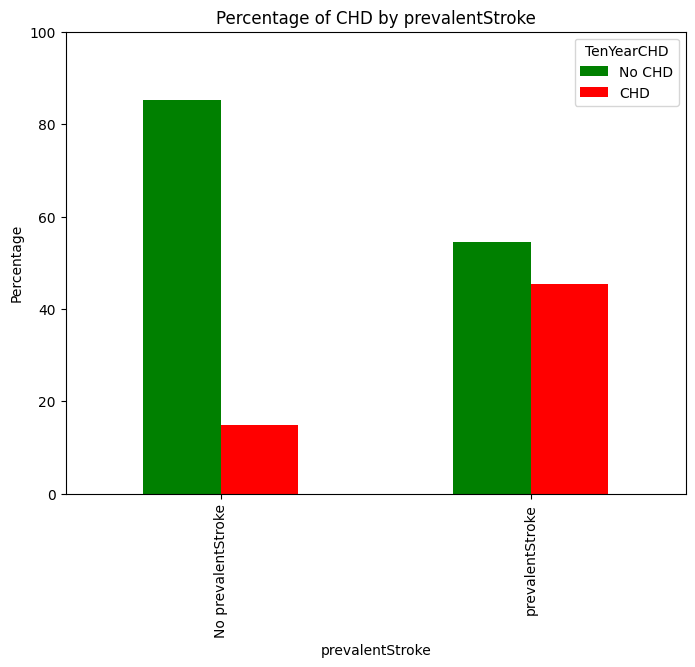

In [12]:
# Chart - 5 visualization code

freq_df3 = df.groupby('TenYearCHD')['prevalentStroke'].value_counts().unstack(0)

# Calculate the percentage by dividing by the sum of each row
pct_df3 = freq_df3.divide(freq_df3.sum(axis=1), axis=0) * 100

# Create a bar plot with custom colors for 'No CHD' and 'CHD Risk'
ax = pct_df3.plot(kind="bar", color=['green', 'red'], figsize=(8, 6))

# Set the y-axis limits to be between 0 and 100
plt.ylim(0, 100)

# Label the y-axis
plt.ylabel('Percentage')

# Set the x-axis ticks and labels
x_ticks_labels = ['No prevalentStroke', 'prevalentStroke']
ax.set_xticks(range(len(x_ticks_labels)))
ax.set_xticklabels(x_ticks_labels)

# Add a title to the plot
plt.title('Percentage of CHD by prevalentStroke')

# Add a legend to specify colors
plt.legend(title='TenYearCHD', labels=['No CHD', 'CHD'])

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I chose a grouped bar chart to compare 'TenYearCHD' (presence or absence of CHD risk) against 'prevalentStroke' (previous stroke history).

##### 2. What is/are the insight(s) found from the chart?

From the grouped bar chart, it appears that individuals with a history of a previous stroke ('prevalentStroke: 1') have a higher count of CHD. compared to those without a history of stroke ('prevalentStroke: 0').

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Healthcare providers can use this information to identify individuals with a history of stroke as a high-risk group for CHD.

#### Chart - 6

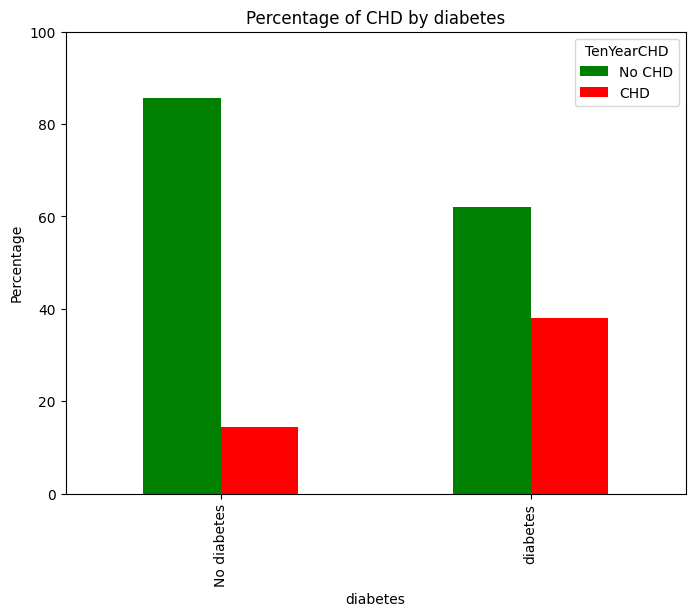

In [13]:
# Chart - 6 visualization code

freq_df4 = df.groupby('TenYearCHD')['diabetes'].value_counts().unstack(0)

# Calculate the percentage by dividing by the sum of each row
pct_df4 = freq_df4.divide(freq_df4.sum(axis=1), axis=0) * 100

# Create a bar plot with custom colors for 'No CHD' and 'CHD Risk'
ax = pct_df4.plot(kind="bar", color=['green', 'red'], figsize=(8, 6))

# Set the y-axis limits to be between 0 and 100
plt.ylim(0, 100)

# Label the y-axis
plt.ylabel('Percentage')

# Set the x-axis ticks and labels
x_ticks_labels = ['No diabetes', 'diabetes']
ax.set_xticks(range(len(x_ticks_labels)))
ax.set_xticklabels(x_ticks_labels)

# Add a title to the plot
plt.title('Percentage of CHD by diabetes')

# Add a legend to specify colors
plt.legend(title='TenYearCHD', labels=['No CHD', 'CHD'])

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I selected a grouped bar chart to compare 'TenYearCHD' (presence or absence of CHD risk) against 'diabetes' (presence or absence of diabetes).

##### 2. What is/are the insight(s) found from the chart?

From the grouped bar chart, it is evident that individuals with diabetes have a higher count of CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Healthcare providers can use this information to identify individuals with diabetes as a high-risk group for CHD. They can implement targeted preventive measures, monitoring, and management strategies for these patients to reduce CHD risk.

#### Chart - 7

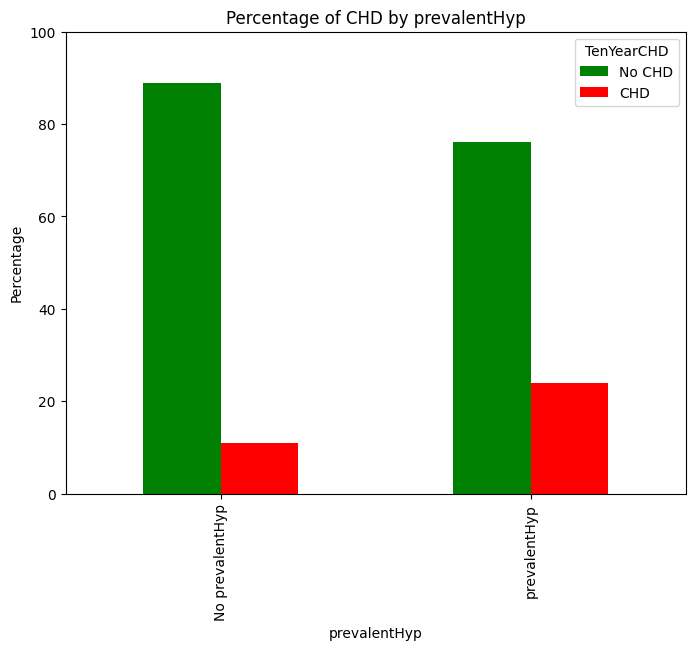

In [14]:
# Chart - 7 visualization code

freq_df = df.groupby('TenYearCHD')['prevalentHyp'].value_counts().unstack(0)

# Calculate the percentage by dividing by the sum of each row
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0) * 100

# Create a bar plot with custom colors for 'No CHD' and 'CHD Risk'
ax = pct_df.plot(kind="bar", color=['green', 'red'], figsize=(8, 6))

# Set the y-axis limits to be between 0 and 100
plt.ylim(0, 100)

# Label the y-axis
plt.ylabel('Percentage')

# Set the x-axis ticks and labels
x_ticks_labels = ['No prevalentHyp', 'prevalentHyp']
ax.set_xticks(range(len(x_ticks_labels)))
ax.set_xticklabels(x_ticks_labels)

# Add a title to the plot
plt.title('Percentage of CHD by prevalentHyp')

# Add a legend to specify colors
plt.legend(title='TenYearCHD', labels=['No CHD', 'CHD'])

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I selected a grouped bar chart to compare 'TenYearCHD' (presence or absence of CHD risk) against 'prevalentHyp' (presence or absence of hypertension).

##### 2. What is/are the insight(s) found from the chart?

From the grouped bar chart, it is evident that individuals with Hypertension have a higher count of CHD compared to those without  Hypertension.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Healthcare providers can use this information to identify individuals with hypertension as a high-risk group for CHD

#### Chart - 8

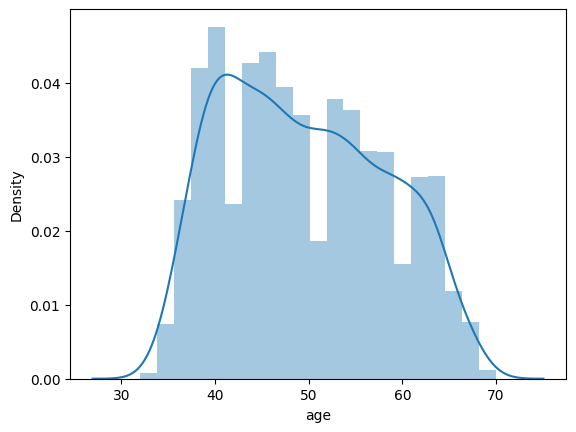

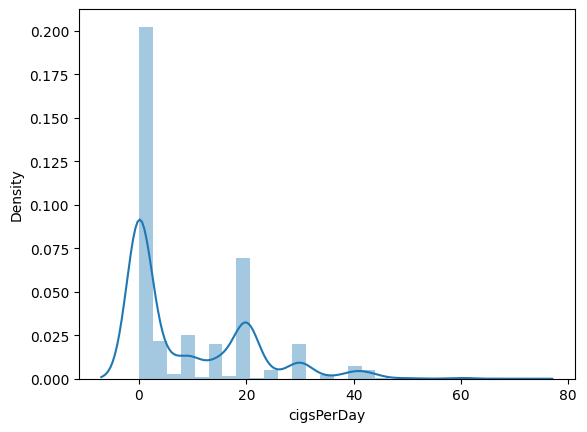

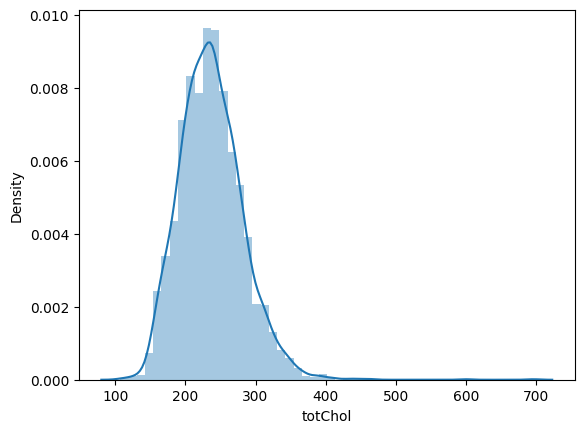

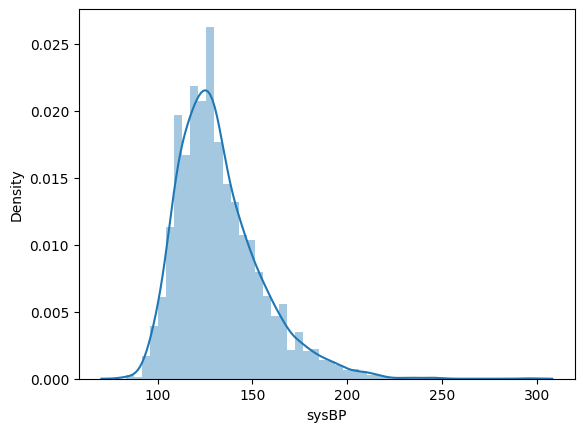

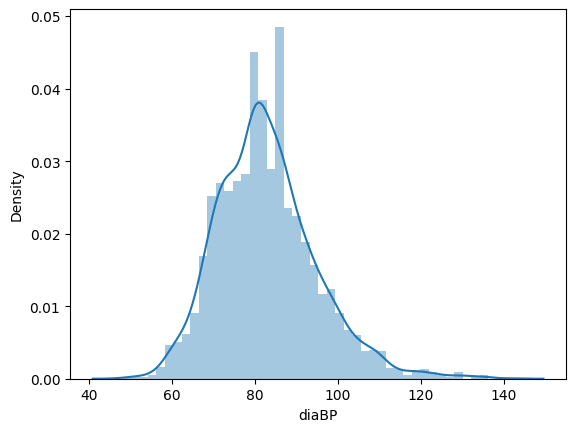

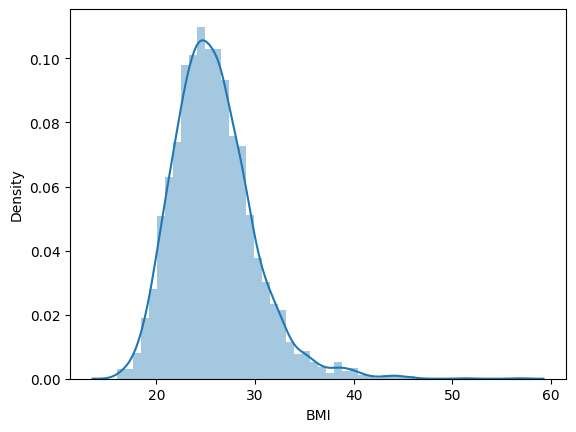

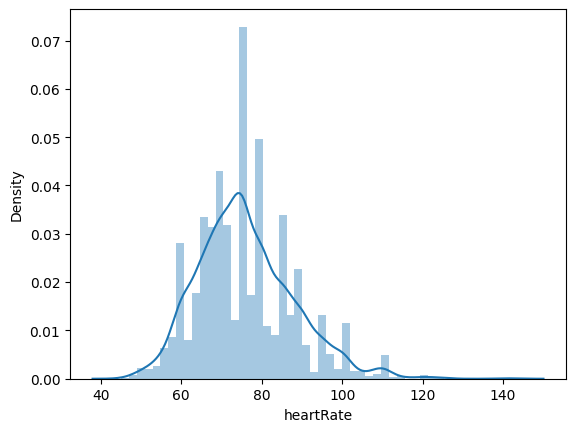

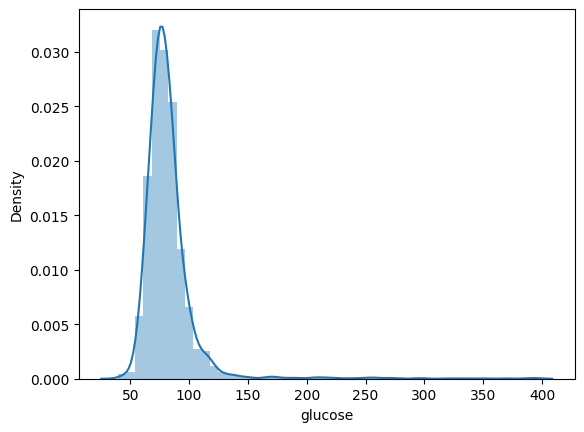

In [16]:
# Chart - 8 visualization code
for i in continuous:
  if i not in ['TenYearCHD']:
    plt.figure()
    sns.distplot(df[i])

##### 1. Why did you pick the specific chart?

I chose a density plot to visualize the distribution of continuous variables

##### 2. What is/are the insight(s) found from the chart?

All the continuous variables are skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We need to apply transformation to make it symmentrical.

#### Chart - 9

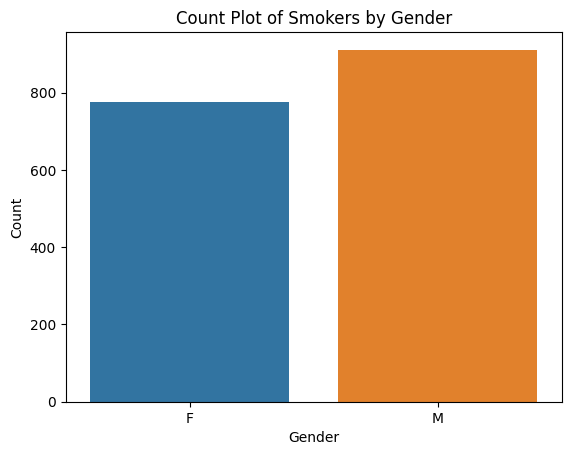

In [17]:
# Chart - 9 visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data to include only rows where 'is_smoking' is 'YES' (smokers)
smokers_data = df[df['is_smoking'] == 'YES']

# Create a count plot of 'sex' for smokers
sns.countplot(x='sex', data=smokers_data)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count Plot of Smokers by Gender')

# Show the plot
plt.show()




##### 1. Why did you pick the specific chart?

I chose a count plot to visualize the distribution of smokers by gender

##### 2. What is/are the insight(s) found from the chart?

From the count plot, it is evident that the count of male smokers is slightly higher compared to female smokers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Male smokes count is greater than female smokers count.

#### Chart - 10

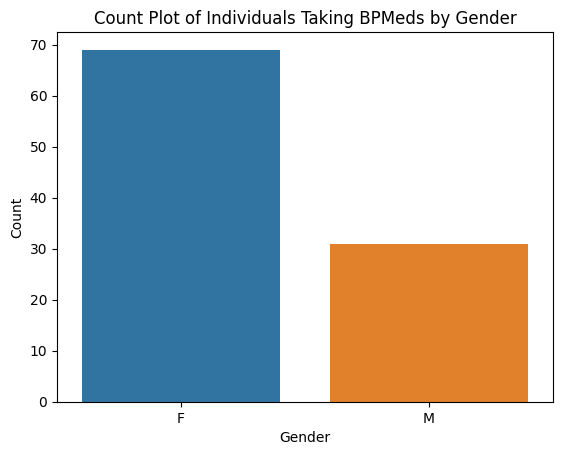

In [18]:
# Chart - 10 visualization co
BP_data = df[df['BPMeds'] == 1]

# Create a count plot of 'sex' for smokers
sns.countplot(x='sex', data=BP_data)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count Plot of Individuals Taking BPMeds by Gender')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

I chose a count plot to visualize the distribution of individuals taking blood pressure medications ('BPMeds')

##### 2. What is/are the insight(s) found from the chart?


From the count plot, it is evident that the count of females taking blood pressure medications ('BPMeds') is higher compared to males.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Healthcare providers can use this data to plan and allocate resources for managing blood pressure-related health issues, considering the higher prevalence among females.

#### Chart - 11

[Text(0.5, 1.0, 'TenYearCHD acording to is_smoking ')]

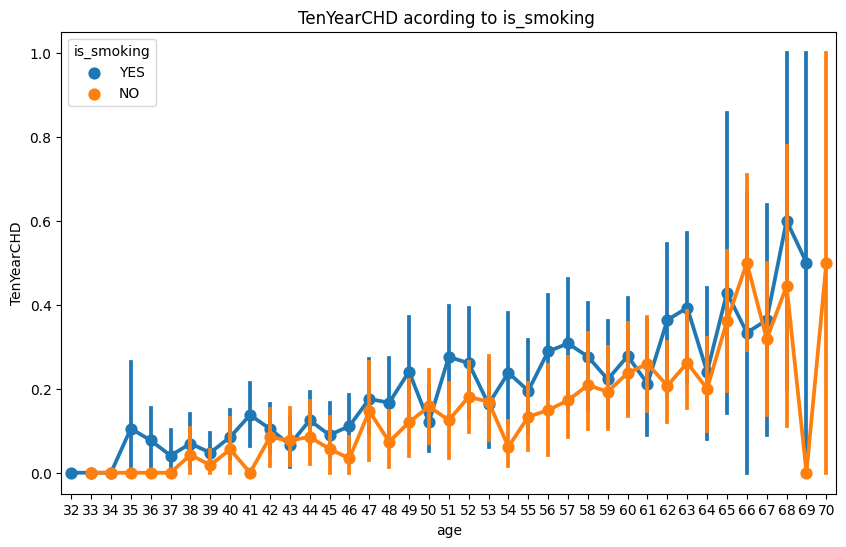

In [20]:
# Chart - 11 visualization code
fig,ax=plt.subplots(figsize=(10,6))
sns.pointplot(data=df,x='age',y='TenYearCHD',hue='is_smoking',ax=ax)
ax.set(title='TenYearCHD acording to is_smoking ')

##### 1. Why did you pick the specific chart?

A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars.

##### 2. What is/are the insight(s) found from the chart?

Here, we get between 45-60 of age patients who are smoking getting a chance of 10-year risk of future CHD are high. After age of 60 we are getting some error or outliers in the dataset. So, that's the reason lot of deviations can be observed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Patients who are smoking impacting more on the dependent variable which leads to positive growth on TenYearCHD with respect to age.

#### Chart - 12

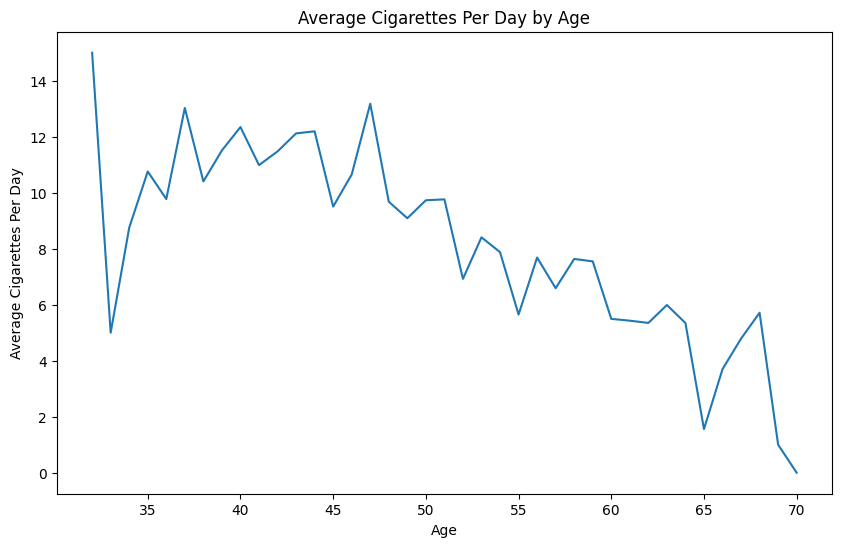

In [21]:
# Chart - 12 visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average 'cigsPerDay' for each age group
average_cigs_per_day_by_age = df.groupby('age')['cigsPerDay'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='cigsPerDay', data=average_cigs_per_day_by_age)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Average Cigarettes Per Day')
plt.title('Average Cigarettes Per Day by Age')

# Show the plot
plt.show()






##### 1. Why did you pick the specific chart?

I chose a line plot to visualize how the average number of cigarettes per day ('cigsPerDay').

##### 2. What is/are the insight(s) found from the chart?

From the line plot, it appears that the average number of cigarettes per day is highest between the ages of 36 and 48 years, after which it decreases as age increases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Public health campaigns and smoking cessation programs can target individuals in the age range of 34 to 50 years  to reduce smoking rates during this critical period.

#### Chart - 13

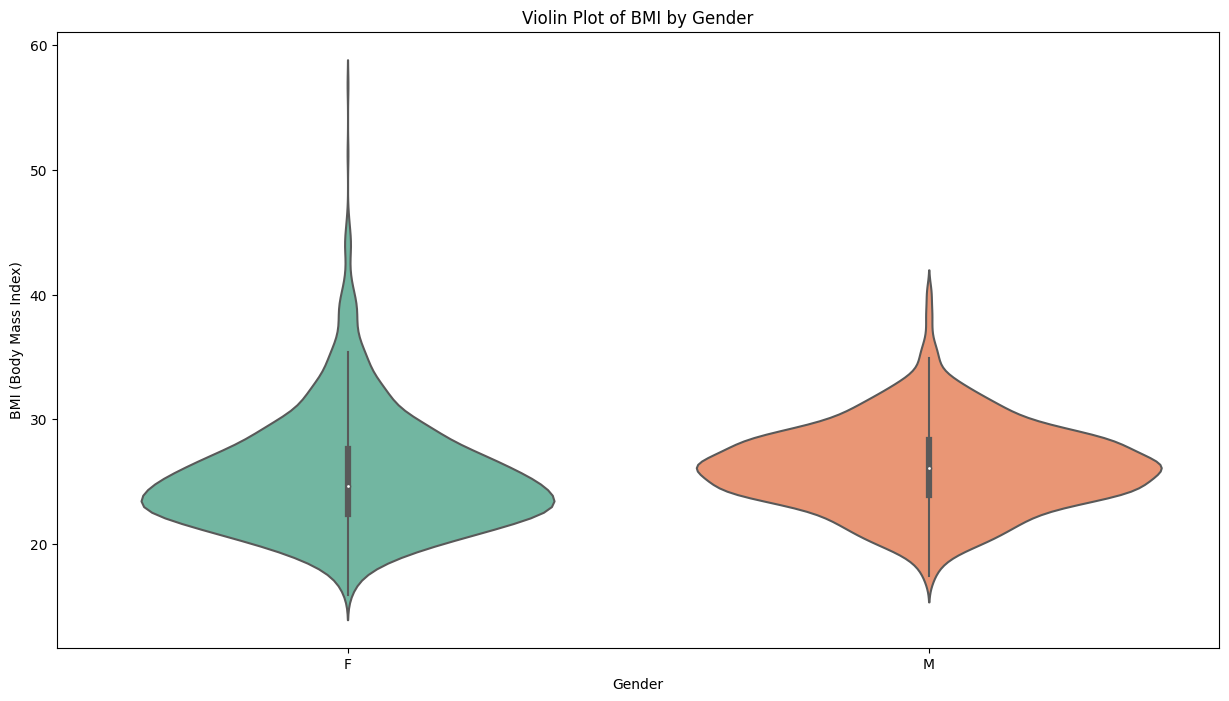

In [22]:
# Chart - 13 visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot of 'BMI' by 'sex'
plt.figure(figsize=(15, 8))
sns.violinplot(x='sex', y='BMI', data=df, palette='Set2')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('BMI (Body Mass Index)')
plt.title('Violin Plot of BMI by Gender')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Violin plots display the shape, spread, and density of the data distribution. They provide information about the location of the median, quartiles, and outliers, similar to a box plot. Additionally, the width of the violin at different points indicates the density of the data at those values.



##### 2. What is/are the insight(s) found from the chart?

Healthy BMI is considered as a score between 20 - 25. most of the Males lie slightly above 25, and most of the females lie below 25. But the whisker of violin plot in female goes upto 55-60.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights suggest that, on average, males tend to have slightly higher BMI scores than females, with more females falling within the healthy BMI range. The presence of outliers among females with higher BMI scores may indicate a subgroup of individuals who are at a greater risk of weight-related health issues.

#### Chart - 14 - Correlation Heatmap

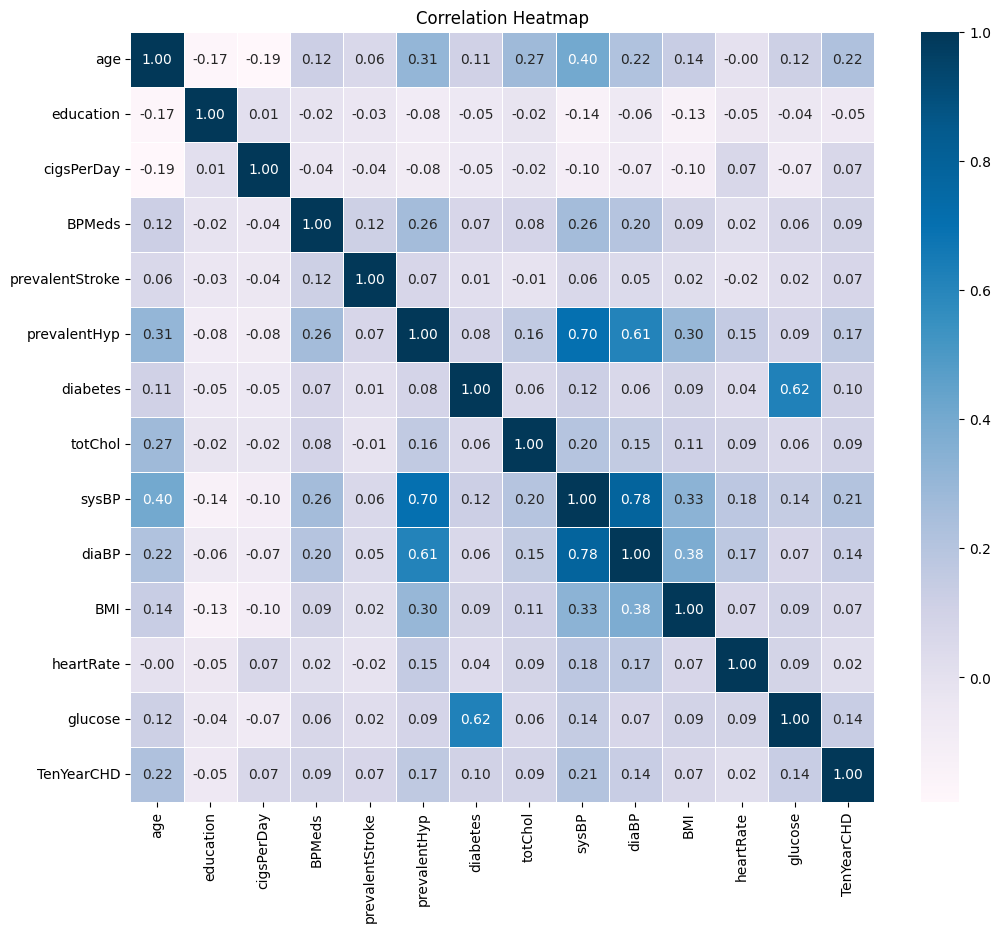

In [24]:
# Correlation Heatmap visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='PuBu', fmt=".2f", linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

I picked a correlation heatmap because it is an effective way to visually represent the relationships (correlations) between numerical variables in a dataset.

##### 2. What is/are the insight(s) found from the chart?

Systolic Blood Pressure (Systolic BP) is strongly correlated with both Diastolic Blood Pressure (Diastolic BP) and Prevalent Hypertension, while Diastolic BP also exhibits a high correlation with Prevalent Hypertension.

#### Chart - 15 - Pair Plot

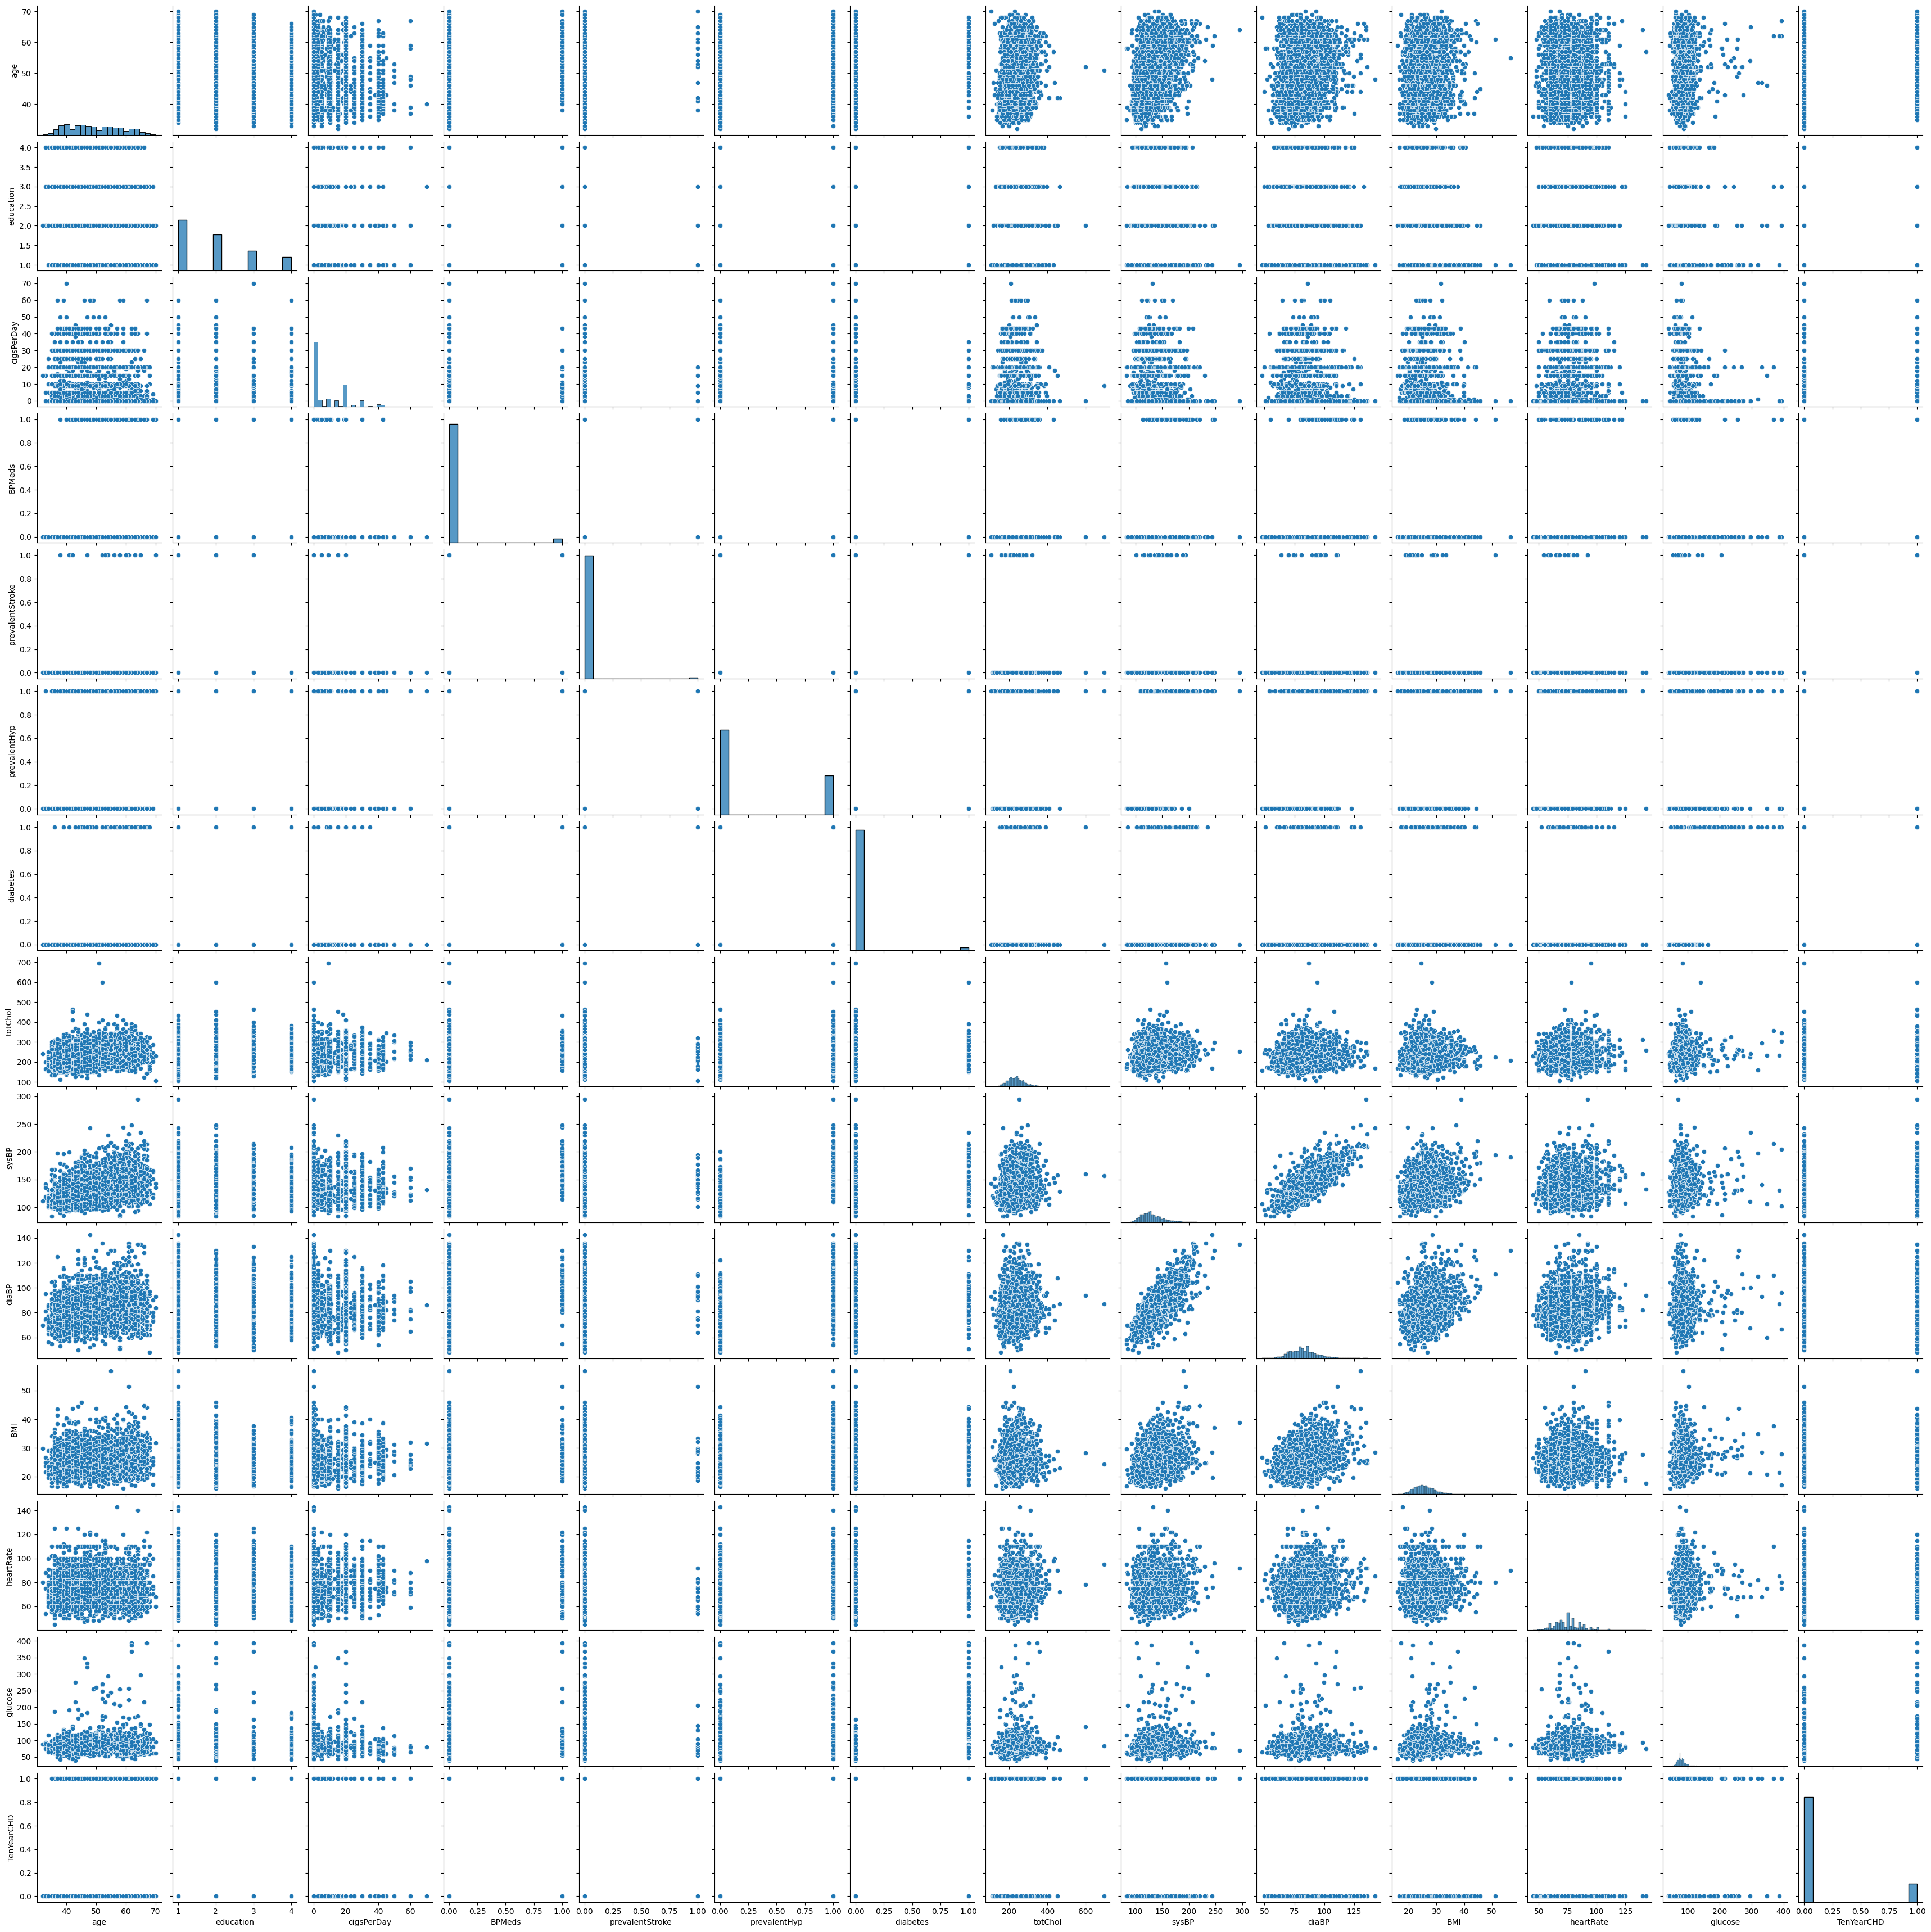

In [25]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Used pairplot for visualizing the relationships between multiple variables in the dataset.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know, there are less linear relationship between variables and data points.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the mean age between individuals with a ten-year risk of coronary heart disease (CHD) and those without.

Alternative Hypothesis (H1): There is a significant difference in the mean age between individuals with and without a ten-year CHD risk.

#### 2. Perform an appropriate statistical test.

In [26]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

chd_yes_age = df[df['TenYearCHD'] == 1]['age']
chd_no_age = df[df['TenYearCHD'] == 0]['age']

t_stat, p_value = stats.ttest_ind(chd_yes_age, chd_no_age, equal_var=False)
print("p_value is", p_value)
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in mean age. ")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean age.")


p_value is 1.8455541117753288e-38
Reject the null hypothesis: There is a significant difference in mean age. 


##### Which statistical test have you done to obtain P-Value?

Two-sample t-test.

##### Why did you choose the specific statistical test?

The t-test is suitable when comparing the means of two independent groups  to determine if there is a significant difference. We are interested in whether age differs between these two groups.


### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no association between smoking status and the risk of coronary heart disease (CHD).

Alternative Hypothesis (H1): There is an association between smoking status and the risk of CHD.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

contingency_table = pd.crosstab(df['is_smoking'], df['TenYearCHD'])

chi2, p, _, _ = stats.chi2_contingency(contingency_table)
print('p-value',p)
if p < 0.05:
    print("Reject the null hypothesis: There is an association between smoking and CHD risk.")
else:
    print("Fail to reject the null hypothesis: No significant association between smoking and CHD risk.")


##### Which statistical test have you done to obtain P-Value?

Chi-square test.

##### Why did you choose the specific statistical test?

The chi-square test is used to analyze the association between two categorical variables (smoking status and CHD risk). We want to investigate if there is a significant association between smoking and the presence of CHD risk.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no linear relationship between Body Mass Index (BMI) and Systolic Blood Pressure (SysBP) among individuals in the dataset.

Alternative Hypothesis (H1): There is a linear relationship between BMI and SysBP among individuals in the dataset.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.api as sm

X = df['BMI']
y = df['sysBP']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

p_value = model.pvalues['BMI']
print(p_value)
if p_value < 0.05:
    print("Reject the null hypothesis: There is a linear relationship between BMI and SysBP. p-value =", p_value)
else:
    print("Fail to reject the null hypothesis: No significant linear relationship between BMI and SysBP. p-value =", p_value)


##### Which statistical test have you done to obtain P-Value?

Linear Regression.

##### Why did you choose the specific statistical test?

Linear regression is used to examine the linear relationship between a continuous predictor variable (BMI) and a continuous response variable (Systolic Blood Pressure). We want to assess if there is a significant linear relationship between these two variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df["glucose"]=df["glucose"].fillna(df["glucose"].median())
df['totChol']= df['totChol'].fillna(df['totChol'].median())
df['BMI']= df['BMI'].fillna(df['BMI'].median())
df['heartRate']= df['heartRate'].fillna(df['heartRate'].median())
df['cigsPerDay']= df['cigsPerDay'].fillna(df['cigsPerDay'].median())

In [ ]:
#Imputing categorical missing data with mode.

df['education']= df['education'].fillna(df['education'].mode()[0])
df['BPMeds']= df['BPMeds'].fillna(df['BPMeds'].mode()[0])


#### What all missing value imputation techniques have you used and why did you use those techniques?

I have used mode imputation for categorical variables ('education' and 'BPMeds') and median imputation for numeric variables ('glucose,' 'totChol,' 'BMI,' 'heartRate,' and 'cigsPerDay').

### 2. Handling Outliers

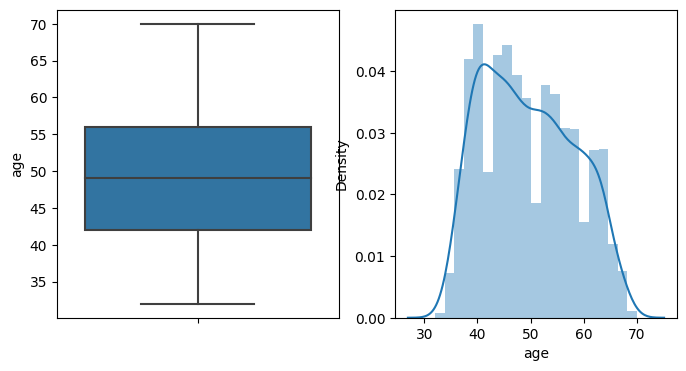

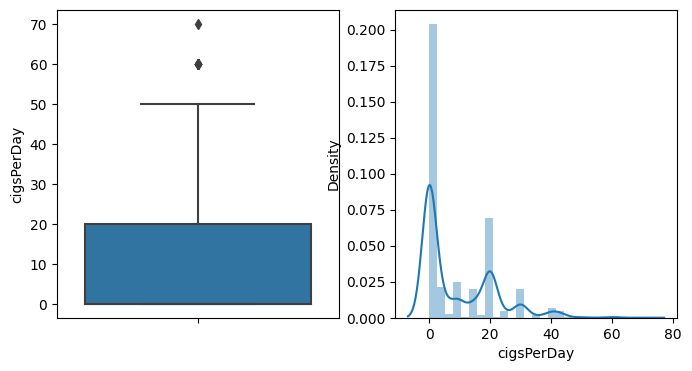

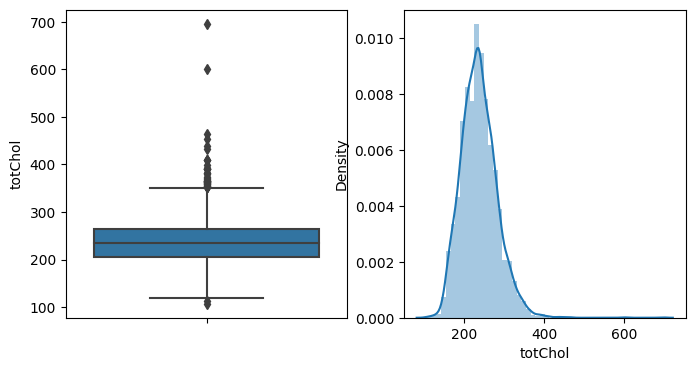

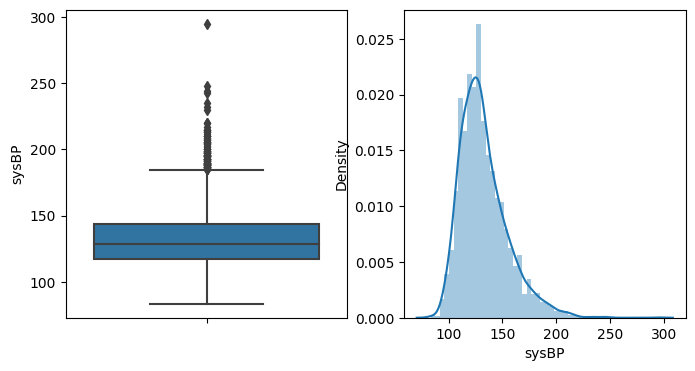

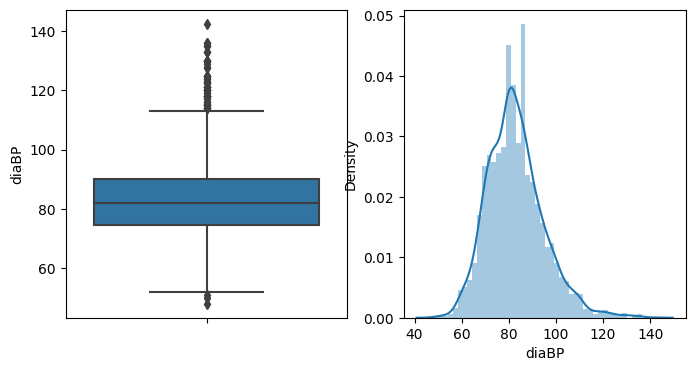

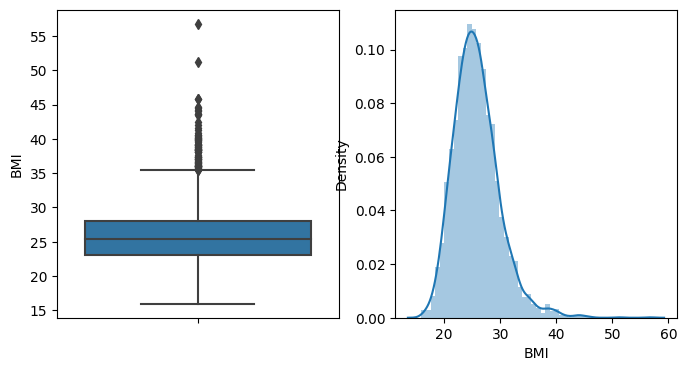

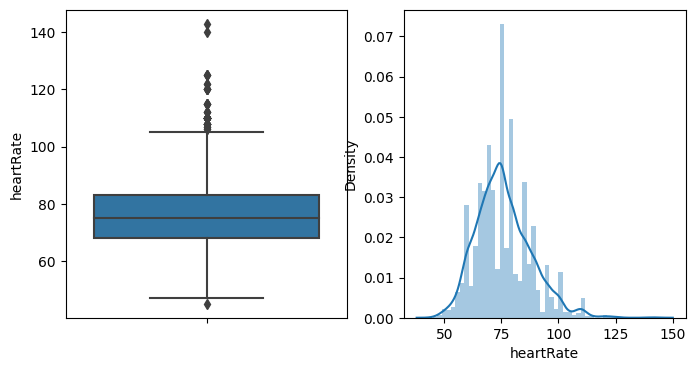

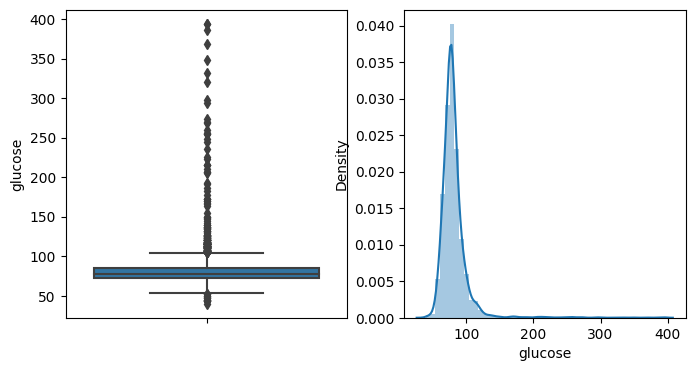

In [ ]:
# Handling Outliers & Outlier treatments

for var in continuous:
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var])
    fig.set_xlabel(var)

    plt.show()


In [ ]:
# #Capping the outlier rows with Percentiles
for i in continuous:
  upper_lim = df[i].quantile(.95)
  lower_lim = df[i].quantile(.05)
  df.loc[(df[i] > upper_lim),i] = upper_lim
  df.loc[(df[i] < lower_lim),i] = lower_lim

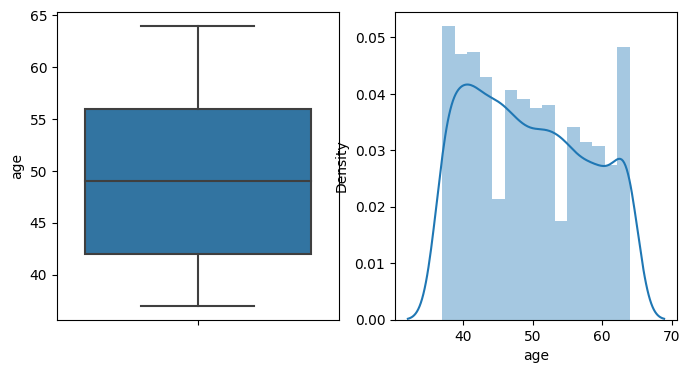

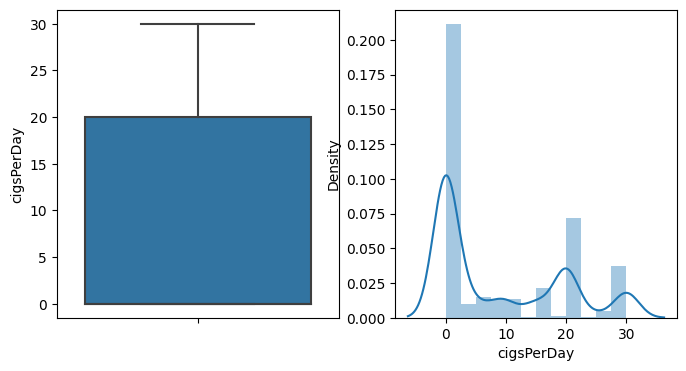

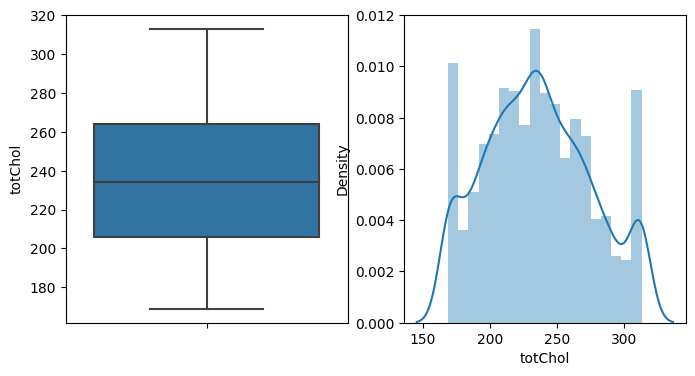

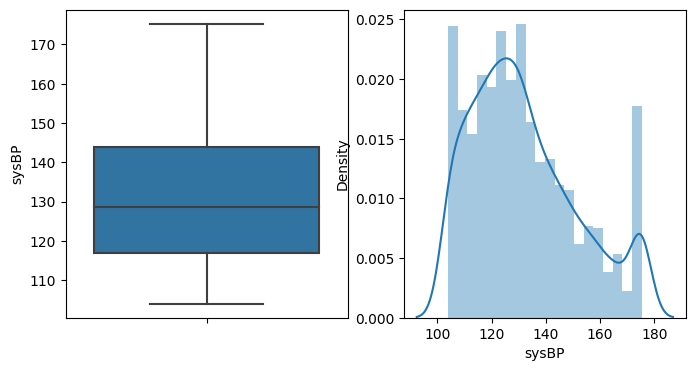

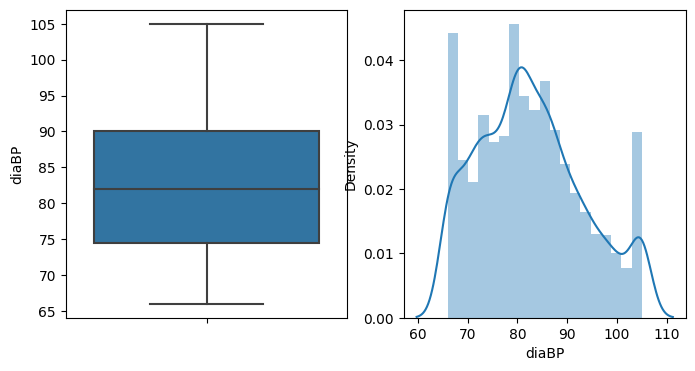

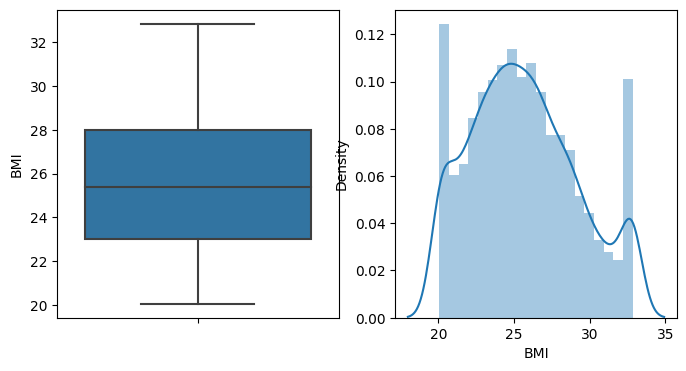

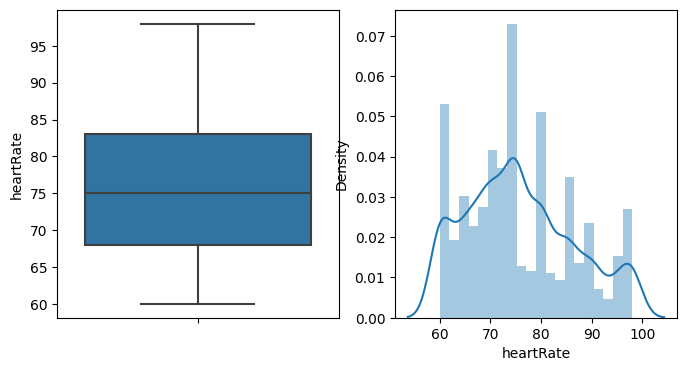

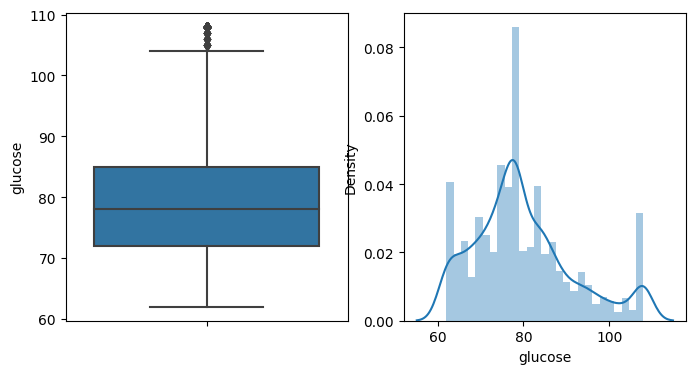

In [ ]:
for var in continuous:
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var])
    fig.set_xlabel(var)

    plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

I used the technique of capping outliers by setting values below the 5th percentile to the 5th percentile value and values above the 95th percentile to the 95th percentile value to remove outliers.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

df['sex'] = df['sex'].apply(lambda x: 1 if x == 'M' else 0)
df['is_smoking'] = df['is_smoking'].apply(lambda x: 1 if x == 'YES' else 0)

#### What all categorical encoding techniques have you used & why did you use those techniques?

I applied binary encoding to categorical variables in the dataset. I encoded 'sex' and 'is_smoking' using binary encoding, where 'M' and 'YES' were converted to 1, and all other values were set to 0.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

#### 2. Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
y=df['TenYearCHD']
x=df.drop(columns='TenYearCHD')
estimator = RandomForestClassifier()
estimator.fit(x, y)
importances = estimator.feature_importances_
feature_importances = list(zip(x.columns, importances))
feature_importances.sort(key=lambda x: x[1], reverse=True)

top_n = 10
selected_features = [feature[0] for feature in feature_importances[:top_n]]



In [ ]:
selected_features

['sysBP',
 'BMI',
 'totChol',
 'age',
 'diaBP',
 'glucose',
 'heartRate',
 'cigsPerDay',
 'education',
 'sex']

##### What all feature selection methods have you used  and why?

 used the Random Forest classifier to calculate feature importances. This method helps identify the most important features based on their contribution to the model's prediction accuracy.

##### Which all features you found important and why?

The selected important features for predicting coronary heart disease (CHD) include BMI, systolic blood pressure, id, total cholesterol, age, diastolic blood pressure, glucose, heart rate, cigarettes per day, and education.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

### 6. Data Scaling

In [ ]:
from scipy.stats import zscore
X = df[selected_features].apply(zscore)
Y=df['TenYearCHD']

##### Which method have you used to scale you data and why?

I used the Z-score scaling method, implemented with the zscore function to scale the data. I chose this method because it transforms the data to have a mean of 0 and a standard deviation of 1 for each feature.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

The dataset is imbalanced, as there are significantly fewer instances of individuals with CHD risk compared to those without CHD risk.we need to balance the data.

In [ ]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X,Y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))


Original dataset shape 3390
Resampled dataset shape 5758


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used Synthetic Minority Over-sampling Technique (SMOTE) to address the imbalanced dataset because it generates synthetic samples for the minority class to achieve a more balanced class distribution, improving model performance.

### 9. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)


##### What data splitting ratio have you used and why?

I splitted dataset into 80% train data 20% test data.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create and train the logistic regression model
logistic_model = LogisticRegression(C=1)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
logistic_y_pred = logistic_model.predict(X_test)

# Calculate evaluation metrics for logistic regression
logistic_accuracy = accuracy_score(y_test, logistic_y_pred)
logistic_precision = precision_score(y_test, logistic_y_pred)
logistic_recall = recall_score(y_test, logistic_y_pred)
logistic_f1 = f1_score(y_test, logistic_y_pred)

print("Logistic Regression Evaluation Metrics:")
print(f"Accuracy: {logistic_accuracy:.2f}")
print(f"Precision: {logistic_precision:.2f}")
print(f"Recall: {logistic_recall:.2f}")
print(f"F1 Score: {logistic_f1:.2f}")

logistic_cm = confusion_matrix(y_test, logistic_y_pred)
print("Confusion Matrix for Logistic Regression:")
print(logistic_cm)

Logistic Regression Evaluation Metrics:
Accuracy: 0.67
Precision: 0.66
Recall: 0.69
F1 Score: 0.67
Confusion Matrix for Logistic Regression:
[[388 201]
 [176 387]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
eval_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Add the evaluation metrics for the Logistic Regression model
eval_df = eval_df.append({'Model': 'Logistic Regression',
                          'Accuracy': logistic_accuracy,
                          'Precision': logistic_precision,
                          'Recall': logistic_recall,
                          'F1 Score': logistic_f1}, ignore_index=True)
eval_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.672743,0.658163,0.687389,0.672459


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import cross_val_score, GridSearchCV

# Define hyperparameter grid for Logistic Regression
logistic_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

# Create a Logistic Regression model
logistic_model = LogisticRegression()

# Perform 5-fold cross-validation with Grid Search
logistic_grid_search = GridSearchCV(logistic_model, logistic_param_grid, cv=5, scoring='accuracy')
logistic_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_logistic_params = logistic_grid_search.best_params_

# Fit the Logistic Regression model with the best hyperparameters
best_logistic_model = LogisticRegression(**best_logistic_params)
best_logistic_model.fit(X_train, y_train)

# Make predictions on the test set
logistic_grid_search_y_pred = best_logistic_model.predict(X_test)

# Calculate evaluation metrics for Logistic Regression with Grid Search
logistic_grid_search_accuracy = accuracy_score(y_test, logistic_grid_search_y_pred)
logistic_grid_search_precision = precision_score(y_test, logistic_grid_search_y_pred)
logistic_grid_search_recall = recall_score(y_test, logistic_grid_search_y_pred)
logistic_grid_search_f1 = f1_score(y_test, logistic_grid_search_y_pred)

print("Logistic Regression with Grid Search Evaluation Metrics:")
print(f"Best Hyperparameters: {best_logistic_params}")
print(f"Accuracy: {logistic_grid_search_accuracy:.2f}")
print(f"Precision: {logistic_grid_search_precision:.2f}")
print(f"Recall: {logistic_grid_search_recall:.2f}")
print(f"F1 Score: {logistic_grid_search_f1:.2f}")

logistic_grid_search_cm = confusion_matrix(y_test, logistic_grid_search_y_pred)
print("\nConfusion Matrix for Logistic Grid Search:")
print(logistic_grid_search_cm)



Logistic Regression with Grid Search Evaluation Metrics:
Best Hyperparameters: {'C': 0.01}
Accuracy: 0.68
Precision: 0.66
Recall: 0.69
F1 Score: 0.68

Confusion Matrix for Logistic Grid Search:
[[393 196]
 [174 389]]


##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV for hyperparameter optimization to find the best combination of hyperparameters for the logistic regression model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Add the evaluation metrics for the Logistic Regression model

eval_df = eval_df.append({'Model': 'Logistic Regression with Grid Search',
                          'Accuracy': logistic_grid_search_accuracy,
                          'Precision': logistic_grid_search_precision,
                          'Recall': logistic_grid_search_recall,
                          'F1 Score': logistic_grid_search_f1}, ignore_index=True)
eval_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.672743,0.658163,0.687389,0.672459
1,Logistic Regression with Grid Search,0.678819,0.664957,0.690941,0.677700


there is no improvement in area under roc.

### ML Model - 2

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create and train the random forest model
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
random_forest_y_pred = random_forest_model.predict(X_test)

# Calculate evaluation metrics for random forest
random_forest_accuracy = accuracy_score(y_test, random_forest_y_pred)
random_forest_precision = precision_score(y_test, random_forest_y_pred)
random_forest_recall = recall_score(y_test, random_forest_y_pred)
random_forest_f1 = f1_score(y_test, random_forest_y_pred)

print("Random Forest Evaluation Metrics:")
print(f"Accuracy: {random_forest_accuracy:.2f}")
print(f"Precision: {random_forest_precision:.2f}")
print(f"Recall: {random_forest_recall:.2f}")
print(f"F1 Score: {random_forest_f1:.2f}")

random_forest_cm = confusion_matrix(y_test, random_forest_y_pred)
print("\nConfusion Matrix for Random Forest:")
print(random_forest_cm)

Random Forest Evaluation Metrics:
Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 Score: 0.90

Confusion Matrix for Random Forest:
[[530  59]
 [ 59 504]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Add the evaluation metrics for the Random Forest model
eval_df = eval_df.append({'Model': 'Random Forest',
                          'Accuracy': random_forest_accuracy,
                          'Precision': random_forest_precision,
                          'Recall': random_forest_recall,
                          'F1 Score': random_forest_f1}, ignore_index=True)

eval_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.672743,0.658163,0.687389,0.672459
1,Logistic Regression with Grid Search,0.678819,0.664957,0.690941,0.677700
2,Random Forest,0.897569,0.895204,0.895204,0.895204


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid for Random Forest
rf_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Perform randomized search with cross-validation
rf_random_search = RandomizedSearchCV(rf_model, rf_param_dist, n_iter=10, cv=5, scoring='accuracy')
rf_random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_rf_random_params = rf_random_search.best_params_

# Fit the Random Forest model with the best hyperparameters
best_rf_random_model = RandomForestClassifier(**best_rf_random_params)
best_rf_random_model.fit(X_train, y_train)

# Make predictions on the test set
rf_random_search_y_pred = best_rf_random_model.predict(X_test)

# Calculate accuracy for Random Forest with Randomized Search
rf_random_search_accuracy = accuracy_score(y_test, rf_random_search_y_pred)
rf_random_search_precision = precision_score(y_test, rf_random_search_y_pred)
rf_random_search_recall = recall_score(y_test, rf_random_search_y_pred)
rf_random_search_f1 = f1_score(y_test, rf_random_search_y_pred)

print("Random Forest Evaluation Metrics with Randomized Search:")
print(f"Accuracy: {rf_random_search_accuracy:.2f}")
print(f"Precision: {rf_random_search_precision:.2f}")
print(f"Recall: {rf_random_search_recall:.2f}")
print(f"F1 Score: {rf_random_search_f1:.2f}")


rf_random_search_cm = confusion_matrix(y_test, rf_random_search_y_pred)
print("\nConfusion Matrix for Random Forest randomised Search:")
print(rf_random_search_cm)


Random Forest Evaluation Metrics with Randomized Search:
Accuracy: 0.89
Precision: 0.88
Recall: 0.89
F1 Score: 0.88

Confusion Matrix for Random Forest randomised Search:
[[521  68]
 [ 64 499]]


##### Which hyperparameter optimization technique have you used and why?


I used the Randomized Search technique for hyperparameter optimization in the Random Forest model

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
eval_df = eval_df.append({'Model': 'Random Forest with randomised Search',
                          'Accuracy': rf_random_search_accuracy,
                          'Precision': rf_random_search_precision,
                          'Recall': rf_random_search_recall,
                          'F1 Score': rf_random_search_f1}, ignore_index=True)
eval_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.672743,0.658163,0.687389,0.672459
1,Logistic Regression with Grid Search,0.678819,0.664957,0.690941,0.677700
2,Random Forest,0.897569,0.895204,0.895204,0.895204
3,Random Forest with randomised Search,0.885417,0.880071,0.886323,0.883186


### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create and train the Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test set
naive_bayes_y_pred = naive_bayes_model.predict(X_test)

# Calculate evaluation metrics for Naive Bayes
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_y_pred)
naive_bayes_precision = precision_score(y_test, naive_bayes_y_pred)
naive_bayes_recall = recall_score(y_test, naive_bayes_y_pred)
naive_bayes_f1 = f1_score(y_test, naive_bayes_y_pred)

print("Naive Bayes Evaluation Metrics:")
print(f"Accuracy: {naive_bayes_accuracy:.2f}")
print(f"Precision: {naive_bayes_precision:.2f}")
print(f"Recall: {naive_bayes_recall:.2f}")
print(f"F1 Score: {naive_bayes_f1:.2f}")

naive_bayes_cm = confusion_matrix(y_test, naive_bayes_y_pred)
print("\nConfusion Matrix for Naive Bayes:")
print(naive_bayes_cm)


Naive Bayes Evaluation Metrics:
Accuracy: 0.64
Precision: 0.64
Recall: 0.63
F1 Score: 0.63

Confusion Matrix for Naive Bayes:
[[387 202]
 [208 355]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
eval_df = eval_df.append({'Model': 'Naive Bayes',
                          'Accuracy': naive_bayes_accuracy,
                          'Precision': naive_bayes_precision,
                          'Recall': naive_bayes_recall,
                          'F1 Score': naive_bayes_f1}, ignore_index=True)

eval_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.672743,0.658163,0.687389,0.672459
1,Logistic Regression with Grid Search,0.678819,0.664957,0.690941,0.677700
2,Random Forest,0.897569,0.895204,0.895204,0.895204
3,Random Forest with randomised Search,0.885417,0.880071,0.886323,0.883186
4,Naive Bayes,0.644097,0.637343,0.630551,0.633929


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Gaussian Naive Bayes (usually, there are no hyperparameters to tune)
naive_bayes_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Vary the variance smoothing parameter
}

# Create a Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()

# Perform 5-fold cross-validation with Grid Search
naive_bayes_grid_search = GridSearchCV(naive_bayes_model, naive_bayes_param_grid, cv=5, scoring='accuracy')
naive_bayes_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_naive_bayes_params = naive_bayes_grid_search.best_params_

# Fit the Naive Bayes model with the best hyperparameters
best_naive_bayes_model = GaussianNB(**best_naive_bayes_params)
best_naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test set
naive_bayes_grid_search_y_pred = best_naive_bayes_model.predict(X_test)

# Calculate evaluation metrics for Naive Bayes with Grid Search
naive_bayes_grid_search_accuracy = accuracy_score(y_test, naive_bayes_grid_search_y_pred)
naive_bayes_grid_search_precision = precision_score(y_test, naive_bayes_grid_search_y_pred)
naive_bayes_grid_search_recall = recall_score(y_test, naive_bayes_grid_search_y_pred)
naive_bayes_grid_search_f1 = f1_score(y_test, naive_bayes_grid_search_y_pred)

print("Naive Bayes Evaluation Metrics with Grid Search:")
print(f"Accuracy: {naive_bayes_grid_search_accuracy:.2f}")
print(f"Precision: {naive_bayes_grid_search_precision:.2f}")
print(f"Recall: {naive_bayes_grid_search_recall:.2f}")
print(f"F1 Score: {naive_bayes_grid_search_f1:.2f}")

naive_bayes_cv_cm = confusion_matrix(y_test, naive_bayes_grid_search_y_pred)
print("\nConfusion Matrix for Naive Bayes CV:")
print(naive_bayes_cv_cm)

Naive Bayes Evaluation Metrics with Grid Search:
Accuracy: 0.64
Precision: 0.64
Recall: 0.63
F1 Score: 0.63

Confusion Matrix for Naive Bayes CV:
[[387 202]
 [208 355]]


##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV for hyperparameter optimization to find the best combination of hyperparameters for the Naive baye's model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
eval_df = eval_df.append({'Model': 'Naive Bayes with Grid Search',
                          'Accuracy': naive_bayes_grid_search_accuracy,
                          'Precision': naive_bayes_grid_search_precision,
                          'Recall': naive_bayes_grid_search_recall,
                          'F1 Score': naive_bayes_grid_search_f1}, ignore_index=True)
eval_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.672743,0.658163,0.687389,0.672459
1,Logistic Regression with Grid Search,0.678819,0.664957,0.690941,0.677700
2,Random Forest,0.897569,0.895204,0.895204,0.895204
3,Random Forest with randomised Search,0.885417,0.880071,0.886323,0.883186
4,Naive Bayes,0.644097,0.637343,0.630551,0.633929
5,Naive Bayes with Grid Search,0.644097,0.637343,0.630551,0.633929


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I considered accuracy, precision, recall, and F1 Score as evaluation metrics to comprehensively assess the model's performance in terms of correctly classifying both positive and negative cases while taking into account the balance between precision and recall.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Ichose the Random Forest model  as the final prediction model because it has the highest accuracy  and a good balance between precision  and recall , resulting in a high F1 Score . This indicates that the model performs well in classifying both positive and negative cases while maintaining a good overall accuracy.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

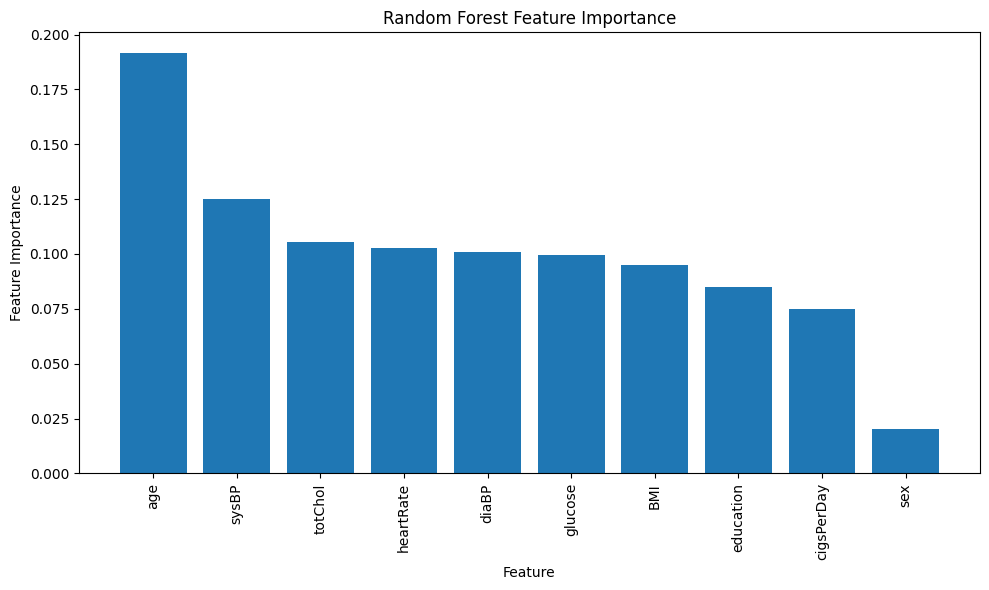

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the Random Forest model
feature_importances = random_forest_model.feature_importances_

# Get the column names (feature names) from your DataFrame
feature_names = X.columns

# Sort feature importances in descending order and get the corresponding feature names
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()




# **Conclusion**

EDA insights:

The analysis revealed that males have a slightly higher percentage of CHD risk compared to females.

Individuals who smoke ('Yes' in the 'is_smoking' category) tend to have a slightly higher frequency of CHD risk.

Those taking blood pressure medication ('BPMeds: Yes') show a higher count of CHD risk compared to those who are not taking such medication ('BPMeds: No').

Individuals with a history of a previous stroke ('prevalentStroke: 1') exhibit a higher count of CHD compared to those without a history of stroke ('prevalentStroke: 0').

Patients with diabetes have a higher count of CHD risk.

Individuals with hypertension also have a higher count of CHD compared to those without hypertension.

The count plot indicates that the number of females taking blood pressure medications ('BPMeds') is higher compared to males.

Among patients aged 45 to 60 who smoke, the 10-year risk of future CHD is notably higher. However, after the age of 60, the dataset contains some errors or outliers, leading to significant deviations in the data.

The line plot suggests that the average number of cigarettes per day is highest between the ages of 36 and 48 years, after which it decreases as age increases. This insight can inform public health campaigns and smoking cessation programs, targeting individuals aged 34 to 50 years to reduce smoking rates during this critical period.

The violin plot reveals that while a healthy BMI falls between scores of 20 - 25, most males tend to have BMIs slightly above 25, while most females have BMIs below 25. However, the whisker of the violin plot for females extends up to 55-60, indicating some extreme values beyond a BMI of 25.

ML insights:
Among the machine learning models considered, Random Forest demonstrated the highest accuracy (0.897569), precision (0.895204), recall (0.895204), and F1 Score (0.895204), making it the preferred choice for predicting CHD risk. This model exhibits robust performance across all evaluation metrics.

The important features identified by the Random Forest model include 'age,' 'sysBP,' 'totChol,' 'heartRate,' 'diaBP,' 'glucose,' 'BMI,' 'education,' 'cigsPerDay,' and 'sex.' These features contribute significantly to the model's ability to predict CHD risk, emphasizing their importance in assessing cardiovascular health.